In [1]:
from matplotlib import pyplot as plt
import numpy as np



In [2]:
def trl(y,D=2,I=5):
    return 1 / (1 + np.exp(-y * D + I))
def trl2(y,D=2, I=5):
    return trl(y,D,I) + trl(y,D, 3*I)



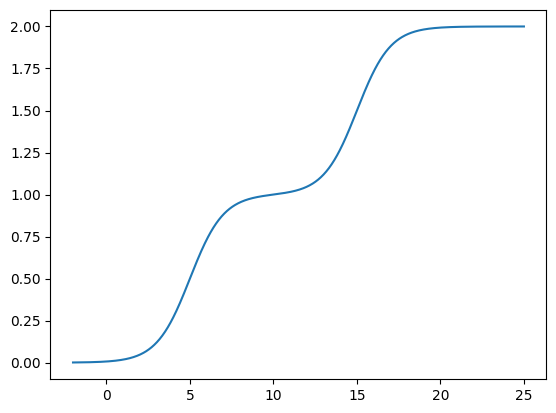

In [3]:
x_rang = np.linspace(-2,25,1000)
plt.plot(x_rang, trl2(x_rang,1))

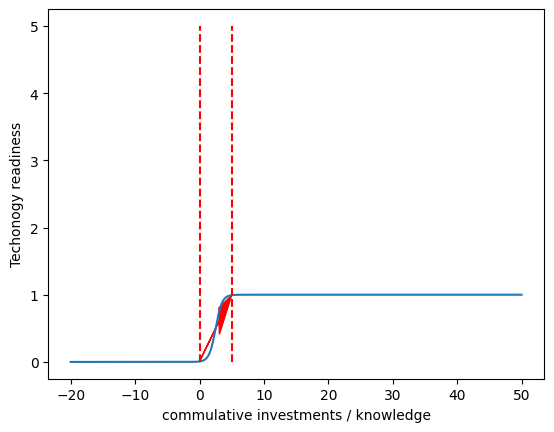

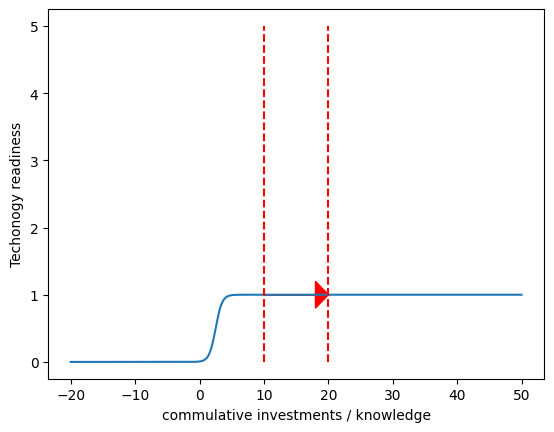

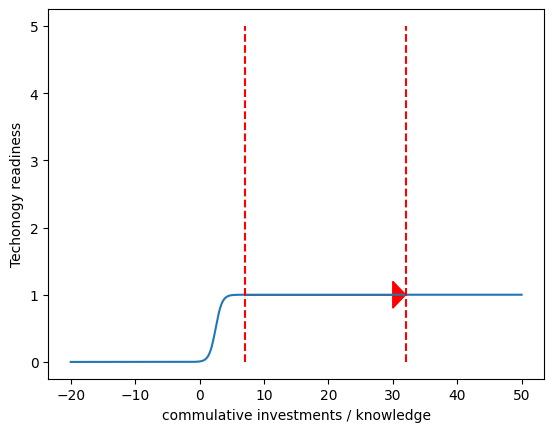

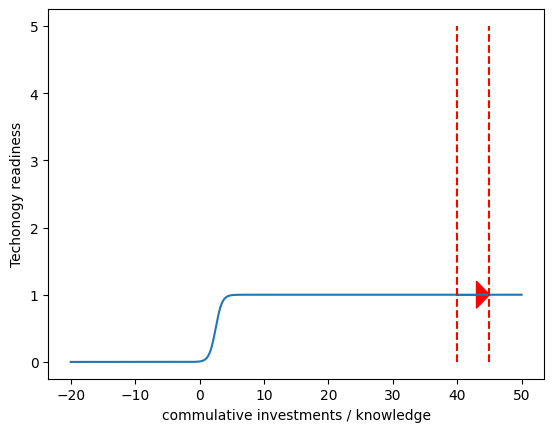

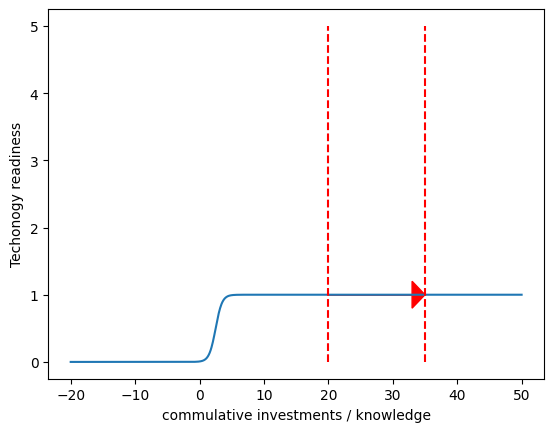

In [4]:

x_rang = np.linspace(-20,50,1000)

StatAct = [(0,5),
           (10,10),
           (7,25),
           (40,5),
           (20,15)
           ]
# S = 5
# a = 5
for S,a in StatAct:
    plt.plot(x_rang,trl(x_rang))
    plt.xlabel("commulative investments / knowledge")
    plt.ylabel("Techonogy readiness")
    plt.vlines([S,S+a],ymin=0,ymax=5,colors=["red","red"],linestyles="--")
    plt.arrow(S,trl(S),a,trl(S+a) - trl(S),length_includes_head = True,color="red", head_width=.4, head_length=2)
    # plt.text(x=S,y=trl(S),s="action")
    
    plt.show()



Text(0.5, 1.0, 'probabilities of initiative psi(p1)=7, phi(p2)=5, c=1')

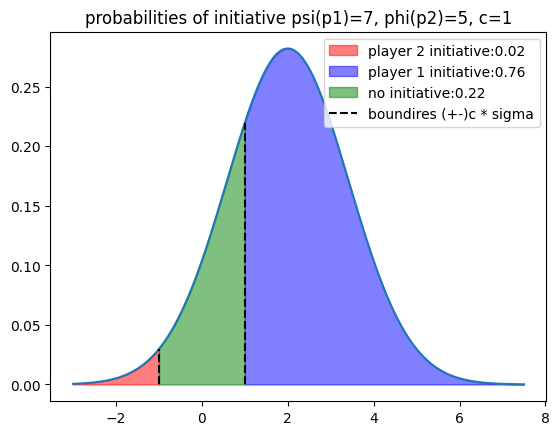

In [60]:
#initaitve 
from scipy.stats import norm

psi = 7
phi = 5
c = 1
sigma = 1
LOWER = -3
UPPER = 7.5
x = np.linspace(LOWER,UPPER,1000)
dist = norm(loc=psi-phi,scale = np.sqrt(2)*sigma)
y = dist.pdf(x)


plt.plot(x,y)
p1 = 1 - dist.cdf(sigma * c)
p2 = dist.cdf(-sigma * c)
p0 = 1 - p1 - p2

lower_x = -sigma * c
x_lower_shade = np.linspace(LOWER,lower_x,500)
y_lower_shade = dist.pdf(x_lower_shade)
plt.fill_between(x_lower_shade,y_lower_shade,alpha=.5,color="red", label=f"player 2 initiative:{round(p2,2)}")

upper_x = sigma * c
x_upper_shade = np.linspace(upper_x,UPPER,750)
y_upper_shade = dist.pdf(x_upper_shade)
plt.fill_between(x_upper_shade,y_upper_shade, alpha = .5, color ="blue", label=f"player 1 initiative:{round(p1,2)}")

x_mid_shade = np.linspace(lower_x,upper_x,500)
y_mid_shade = dist.pdf(x_mid_shade)
plt.fill_between(x_mid_shade, y_mid_shade, color ="green", alpha = .5, label=f"no initiative:{round(p0,2)}")


vlinex= [-1,1]*(sigma * c)
plt.vlines(x=vlinex, ymin=[0,0],ymax=dist.pdf(vlinex), color="black", linestyle="--", label="boundires (+-)c * sigma")

plt.legend()
plt.title(f"probabilities of initiative psi(p1)={psi}, phi(p2)={phi}, c={c}")


In [4]:
import torch
class PseudoDistr():
    def __init__(self, loc = 0, scale = 0 ):
        self.loc = loc
        self.scale = scale

    def sample(self,num):
        return torch.stack([self.loc]*num[0],0)
    
    def cdf(self, val : torch.tensor):
        return torch.tensor([0.0])
    
dist = PseudoDistr(loc=5,scale=0)
print(dist.cdf(torch.tensor( [0.0])))
print(dist.sample(torch.tensor([1.0])))
    
    

tensor([0.])


TypeError: only integer tensors of a single element can be converted to an index